<a href="https://colab.research.google.com/github/Neerajmn28/Data-science-assignments/blob/main/MultiLinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
data=pd.read_csv('/content/50_Startups.csv')

In [ ]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data1=data.drop(['State'],axis=1)

In [ ]:
data1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


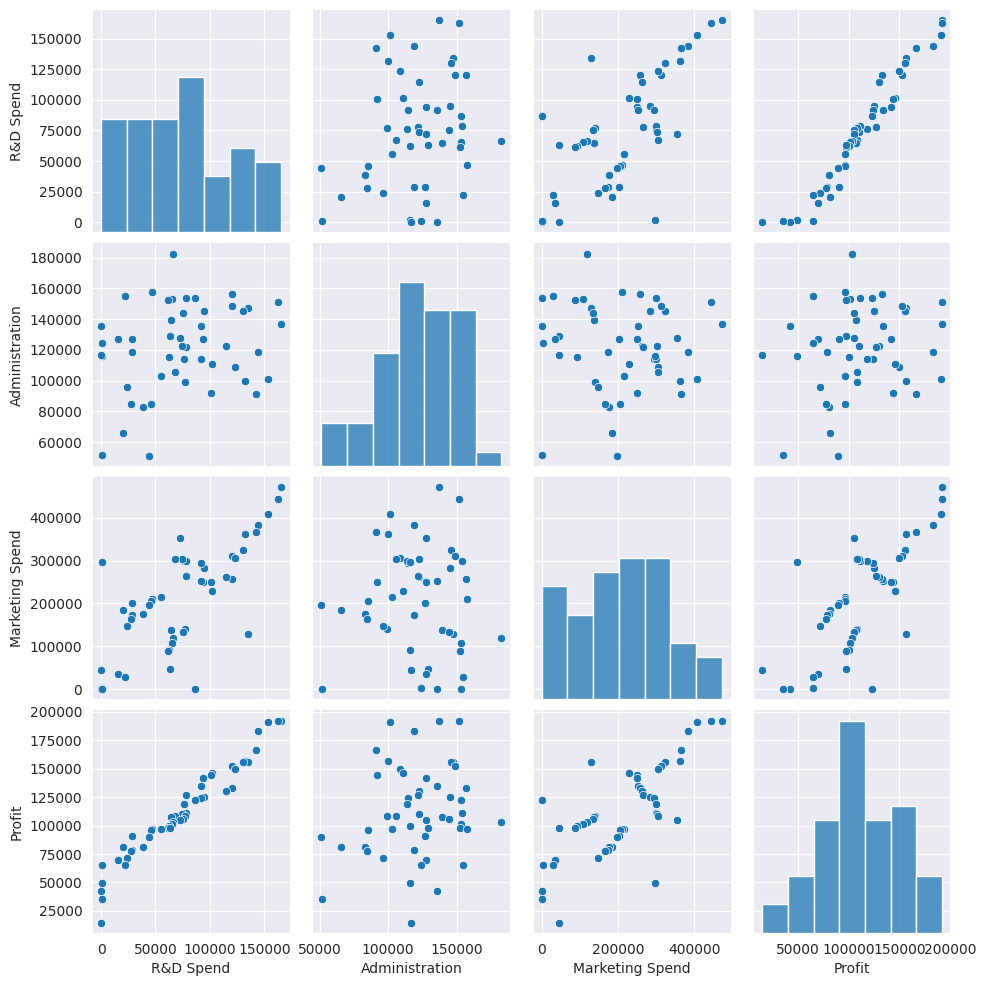

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

<ipython-input-290-4bee9cb1f6ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

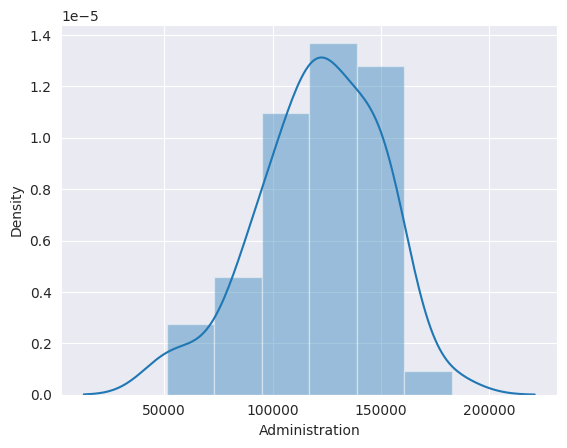

In [ ]:
sns.distplot(data['Administration'])

<ipython-input-291-e4122560aebc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

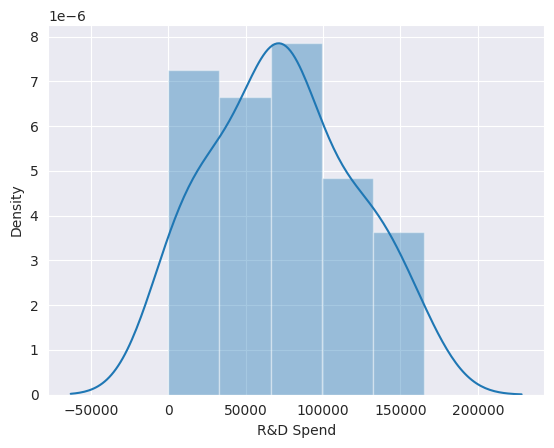

In [ ]:
sns.distplot(data['R&D Spend'])

<ipython-input-292-cf32ea61cd4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Marketing Spend'])


<Axes: xlabel='Marketing Spend', ylabel='Density'>

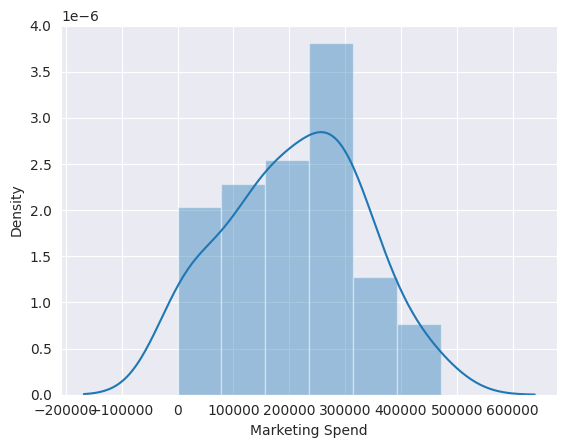

In [ ]:
sns.distplot(data['Marketing Spend'])

<ipython-input-293-5c9dc59bcdb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

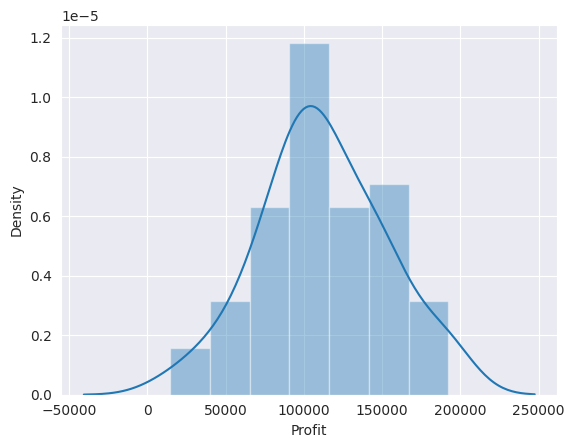

In [ ]:
sns.distplot(data['Profit'])

#Data transformation

In [ ]:
#Log Transformation
data_log1=np.sqrt(data1)

Text(0.5, 1.0, 'Square Root Transformed Data')

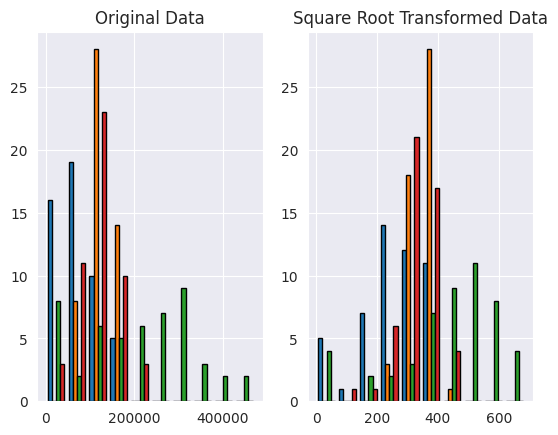

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=2)
axs[0].hist(data1,edgecolor='black')
axs[1].hist(data_log1,edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [ ]:
#Cube Transformation
data_log2=np.cbrt(data1)

Text(0.5, 1.0, 'Transformed Data')

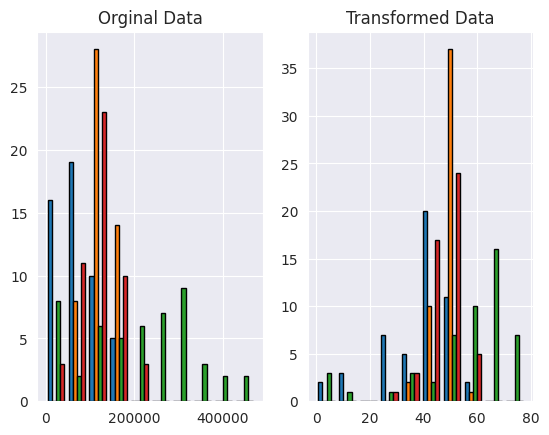

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=2)
axs[0].hist(data1,edgecolor='black')
axs[1].hist(data_log2,edgecolor='black')
axs[0].set_title('Orginal Data')
axs[1].set_title('Transformed Data')

In [ ]:
data1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#Model Building

In [ ]:
data2=data.rename({'R&D Spend':'R','Administration':'AD','Marketing Spend':'MS'},axis=1)

In [ ]:
model=smf.ols('Profit~R+AD+MS',data=data2).fit()

#Model Testing

In [ ]:
model.params

Intercept    50122.192990
R                0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        16:17:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R              0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Tvalues and Pvalues
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
R            17.846374
AD           -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
R            2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [ ]:
#Finding Rsquares
(model.rsquared,model.rsquared_adj)
print('Accuracy is:',model.rsquared,model1.rsquared_adj)

Accuracy is: 0.9507459940683246 0.9475337762901719


In [ ]:
#Build models for Insignificant variables (AD,MS)
model=smf.ols('Profit~AD',data=data2).fit()
print(model.tvalues,'/n',model.pvalues)

Intercept    3.040044
AD           1.419493
dtype: float64 /n Intercept    0.003824
AD           0.162217
dtype: float64


In [ ]:
model=smf.ols('Profit~MS',data=data2).fit()
print(model.tvalues,'/n',model.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 /n Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [ ]:
model=smf.ols('Profit~AD+MS',data=data2).fit()
print(model.tvalues,'/n',model.pvalues)

Intercept    1.142741
AD           2.467779
MS           8.281039
dtype: float64 /n Intercept    2.589341e-01
AD           1.729198e-02
MS           9.727245e-11
dtype: float64


#Model validation Rsquare

In [ ]:
rsq_R=smf.ols('R~AD+MS',data=data2).fit().rsquared
vif_R=1/(1-rsq_R)

In [ ]:
rsq_AD=smf.ols('AD~R+MS',data=data2).fit().rsquared
vif_AD=1/(1-rsq_AD)

In [ ]:
rsq_MS=smf.ols('MS~R+AD',data=data2).fit().rsquared
vif_MS=1/(1-rsq_MS)

In [ ]:
df1=({'Variables':['R','AD','MS'],'Vif':[vif_R,vif_AD,vif_MS]})
Vif_df=pd.DataFrame(df1)
Vif_df

,Variables,Vif
0,R,2.468903
1,AD,1.175091
2,MS,2.326773


All the values are <20 so there is no multi collinearity.

Text(0.5, 1.0, 'Q-Qplot of Residuals')

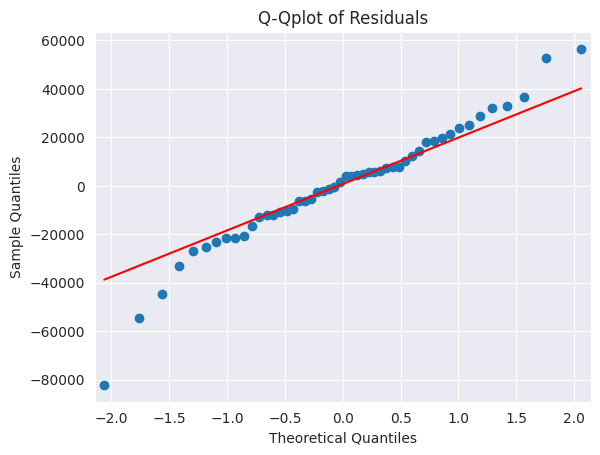

In [ ]:
#QQplot
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Q-Qplot of Residuals')

In [ ]:
list(np.where(model.resid<-30000))

[array([21, 27, 46, 49])]

In [ ]:
#Test for homoscedasticity
def get_standard_values(vals):return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'Standardized_resiual_values')

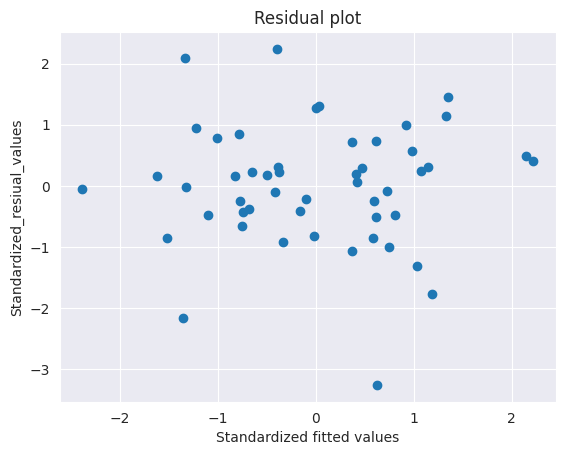

In [ ]:
#To Standardize
plt.scatter(get_standard_values(model.fittedvalues),
            get_standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized_resiual_values')

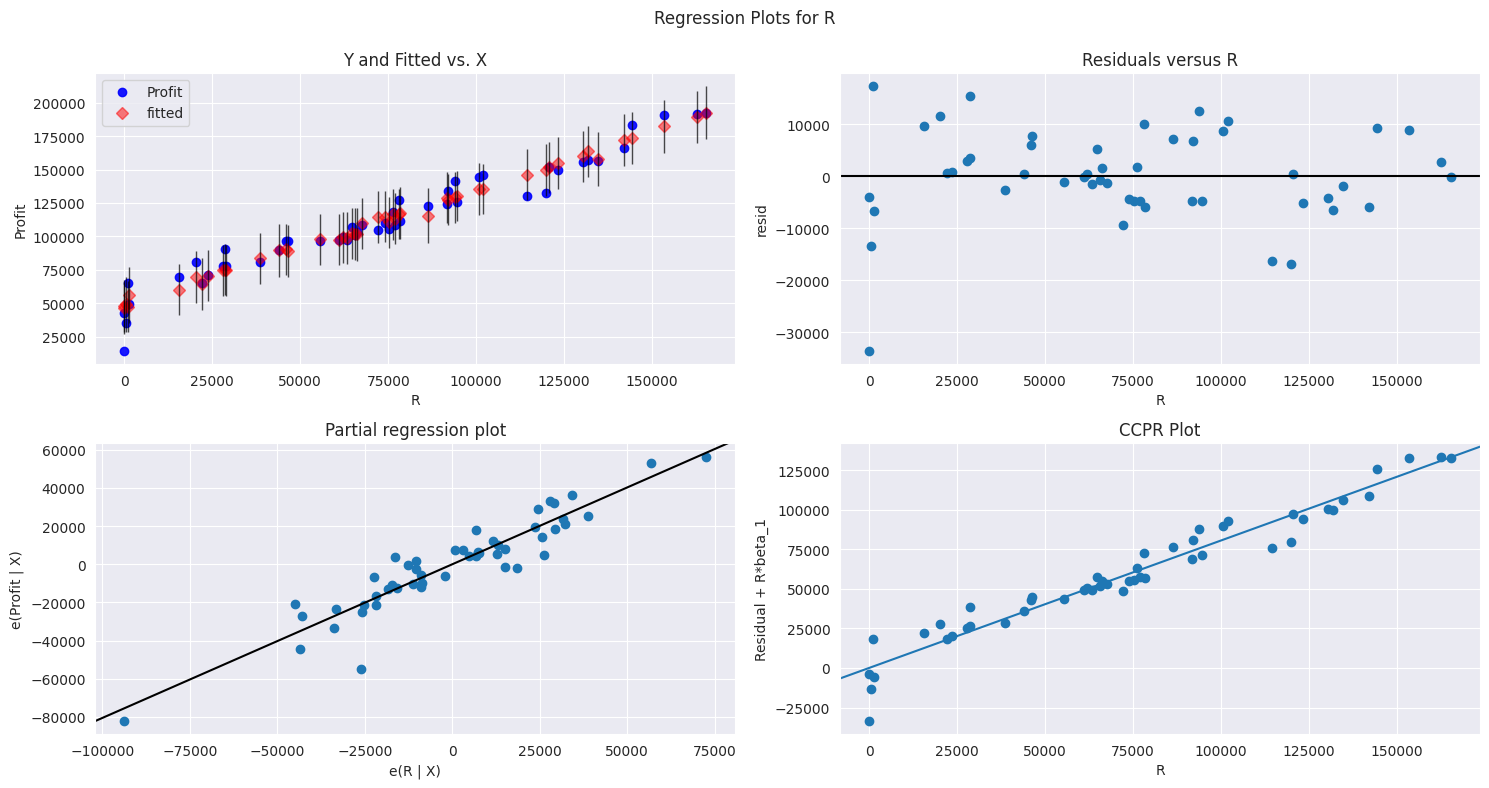

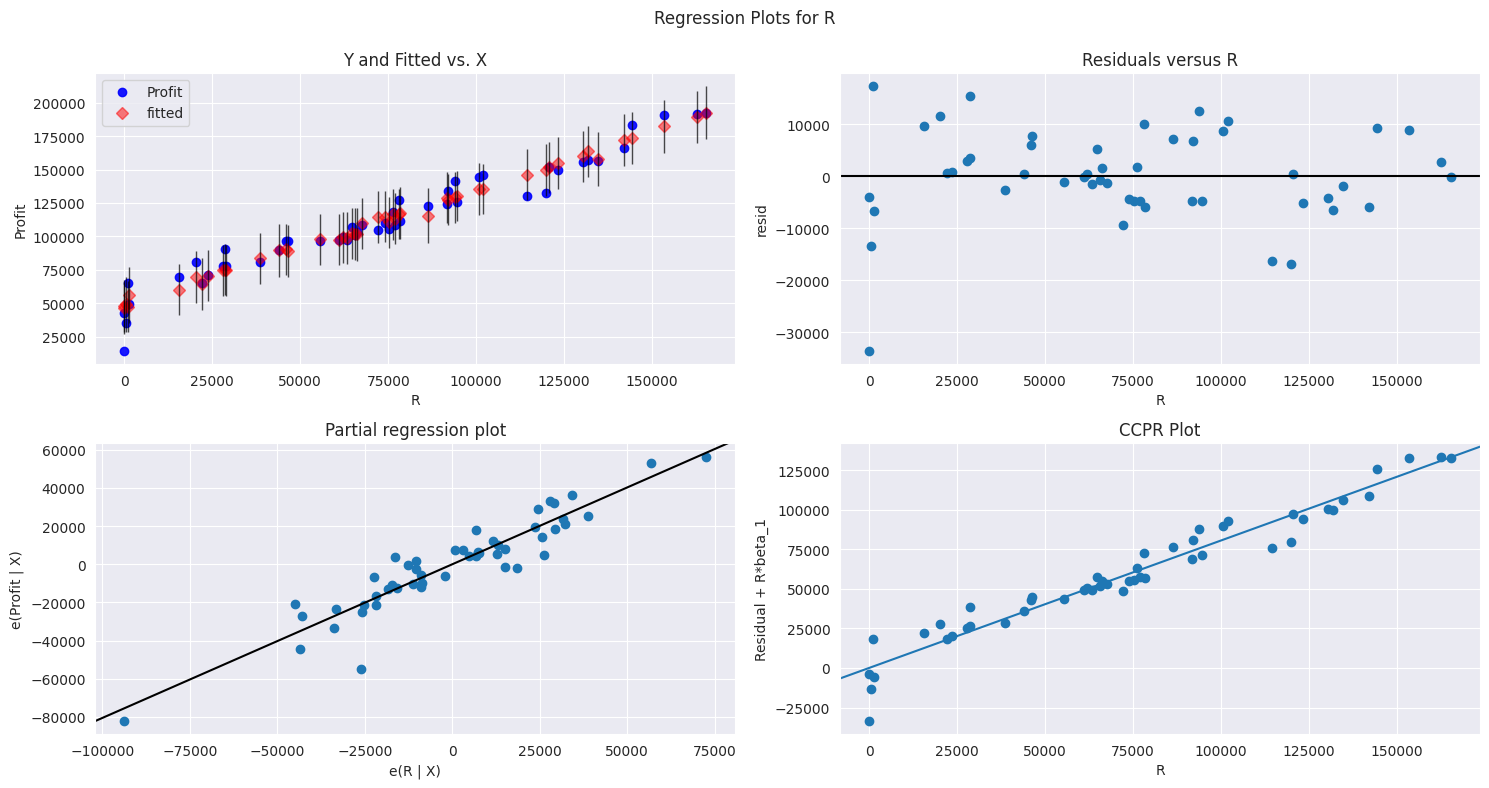

In [ ]:
#Residual vs Regressors
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'R',fig=fig)

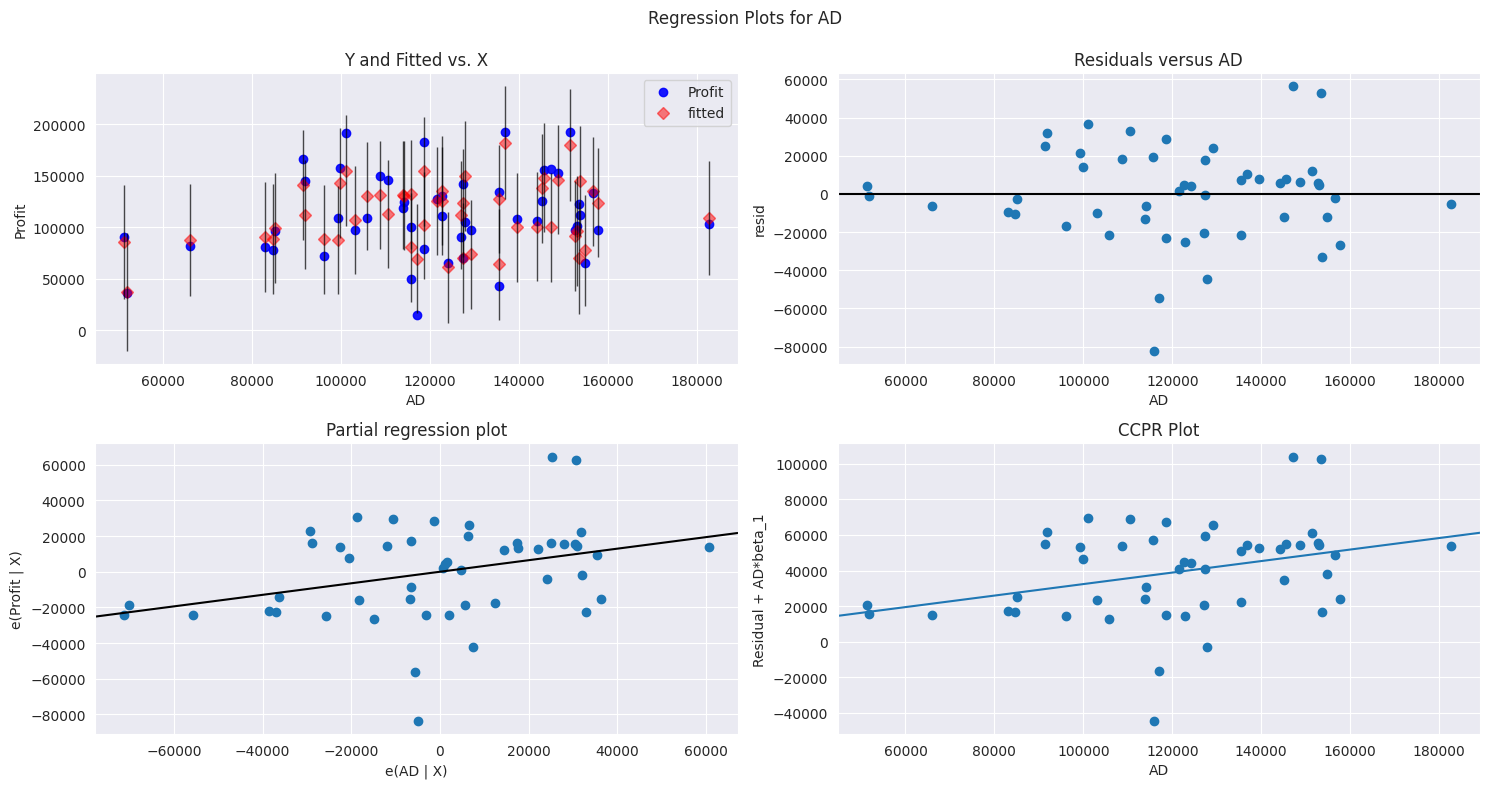

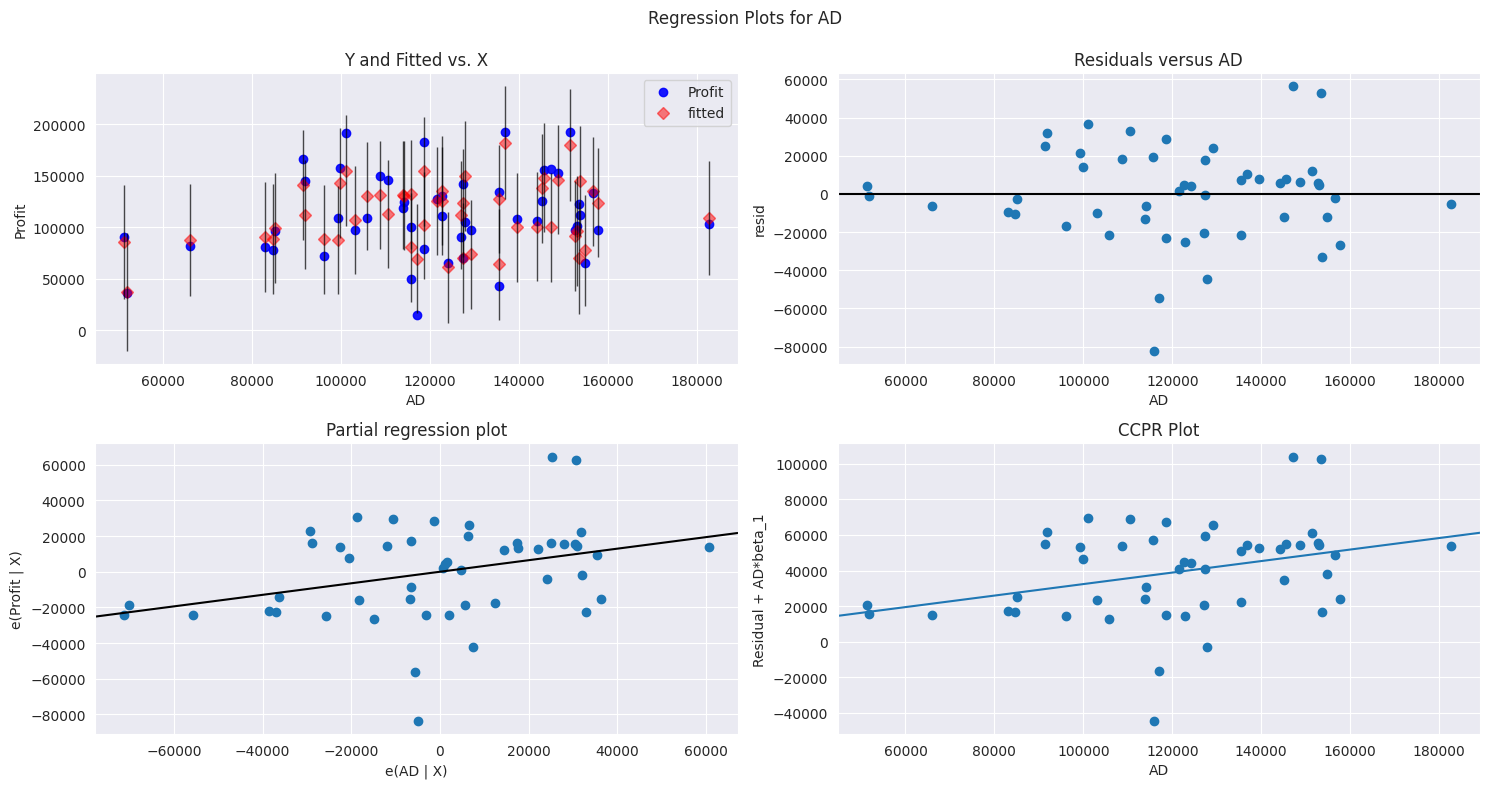

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)

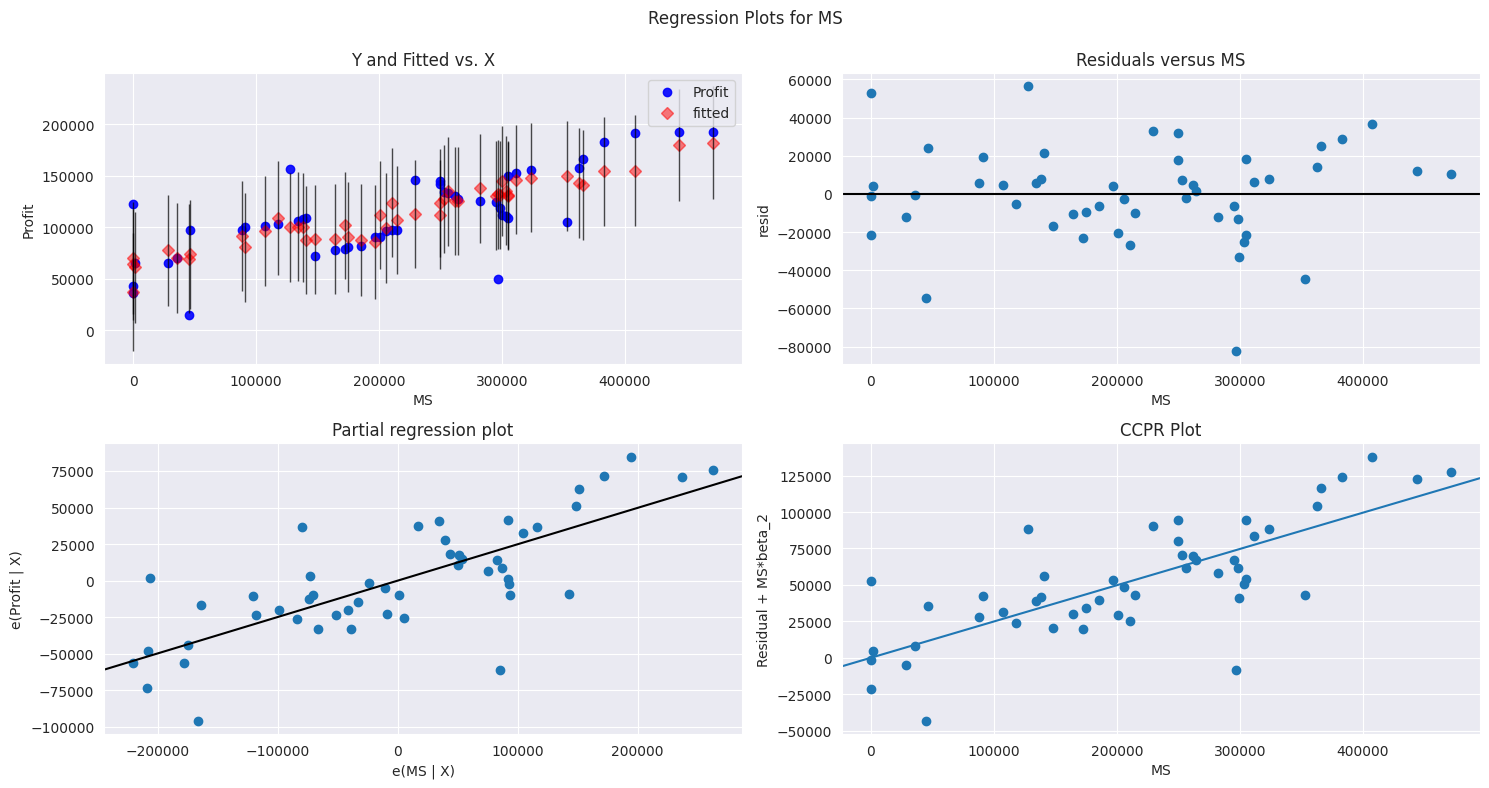

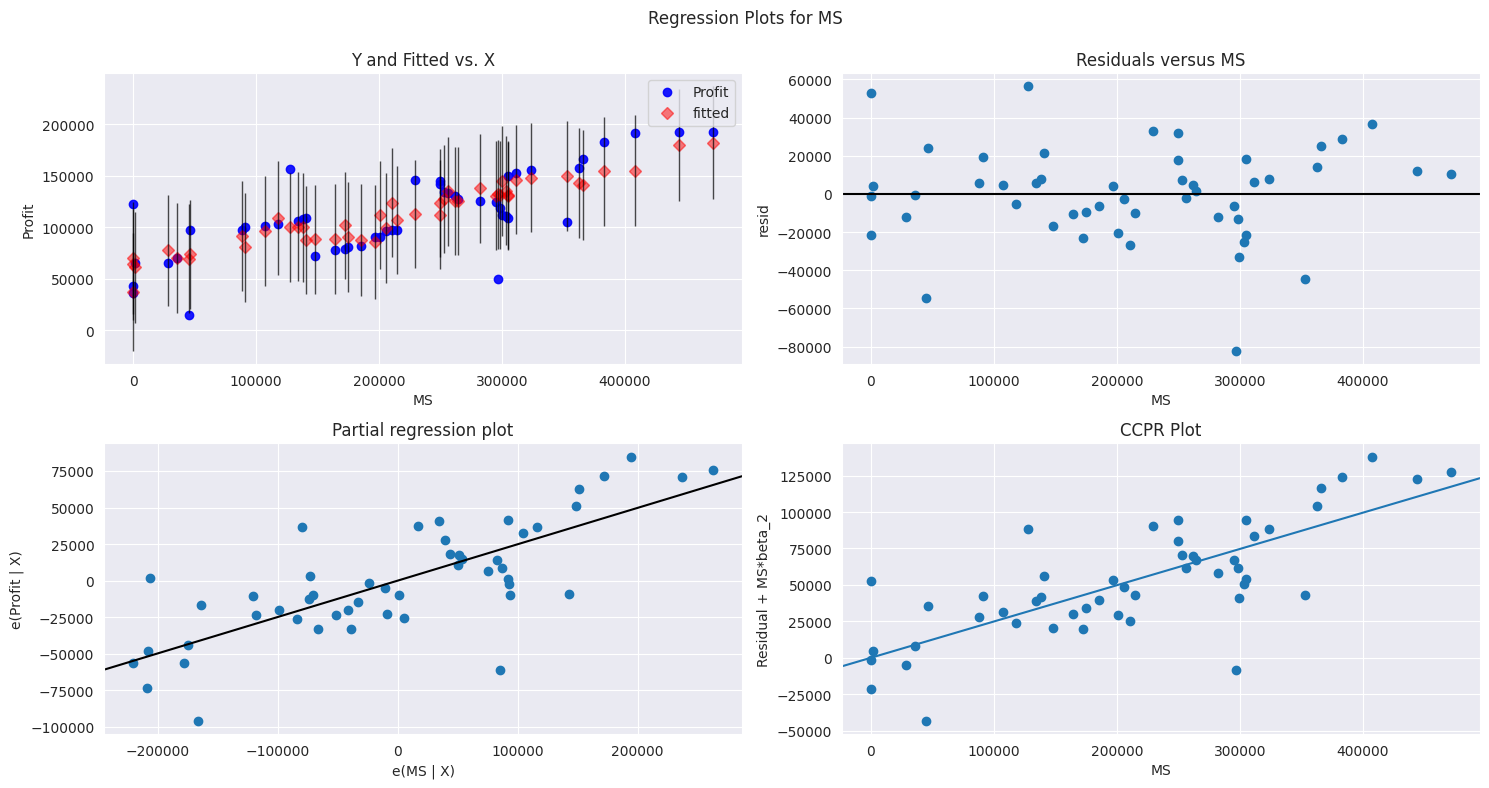

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)

#Model Deletion Diagnostics (Deleting influencers/outliers)

In [ ]:
model_influence=model.get_influence()

In [ ]:
(c,_)=model_influence.cooks_distance

If cooks distance is >1 then its an outlier

In [ ]:
c

array([8.39838700e-03, 1.14873969e-02, 6.56987381e-02, 2.88908332e-02,
       2.79709140e-02, 7.16804815e-03, 8.13809711e-02, 1.85241010e-03,
       1.22027331e-03, 6.61733180e-03, 1.35247093e-02, 2.53489557e-02,
       3.94174194e-03, 8.02036367e-04, 1.42016284e-04, 2.95081144e-04,
       3.35884284e-05, 3.42132384e-03, 6.54885653e-04, 1.85078551e-01,
       2.84861879e-03, 3.73520912e-02, 1.07497235e-02, 9.56175936e-03,
       9.85963822e-03, 1.13174355e-03, 6.78641890e-04, 5.41616669e-02,
       2.51507334e-03, 7.15285794e-04, 8.58305042e-03, 1.29034322e-03,
       1.89459286e-02, 1.59981468e-03, 2.23714369e-02, 1.78833318e-04,
       4.72063572e-03, 1.73121433e-03, 2.62609290e-03, 3.20831672e-03,
       6.39845206e-03, 3.86442369e-03, 6.51113096e-03, 1.04035178e-05,
       8.39238900e-03, 7.75857331e-04, 1.11357048e-01, 2.36146516e-02,
       2.91586816e-04, 9.90987637e-02])

Text(0, 0.5, 'Cooks Distance')

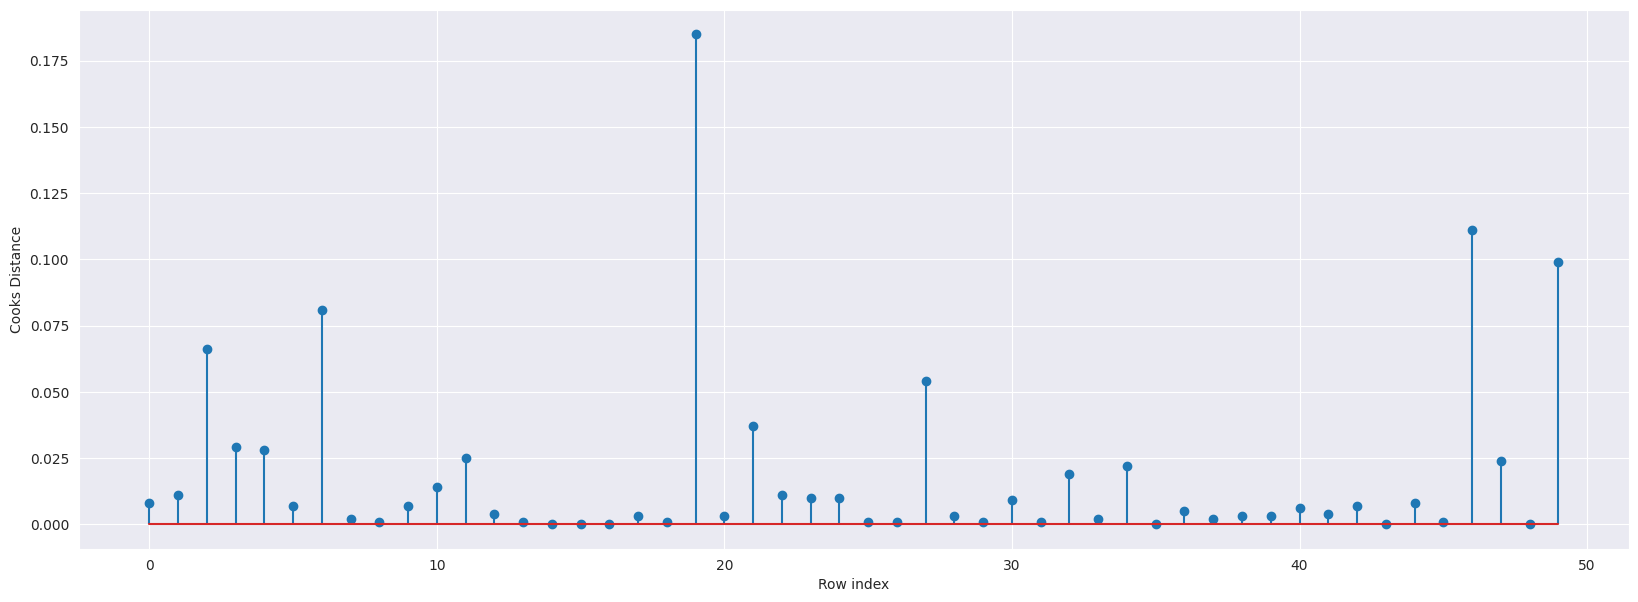

In [ ]:
#Plot the influence values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
#index and value of influencer where c is more than 5
(np.argmax(c),np.max(c))

(19, 0.18507855145120494)

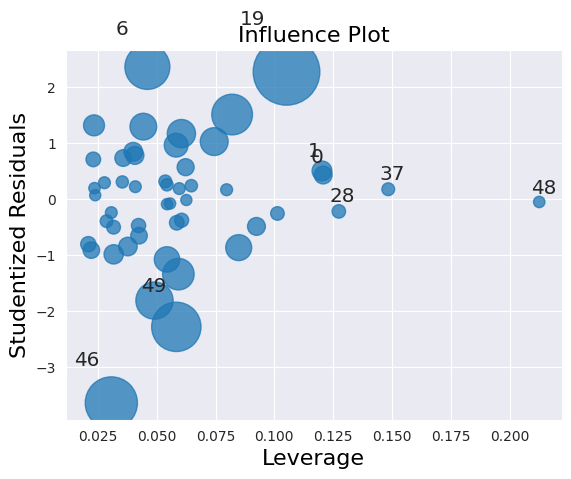

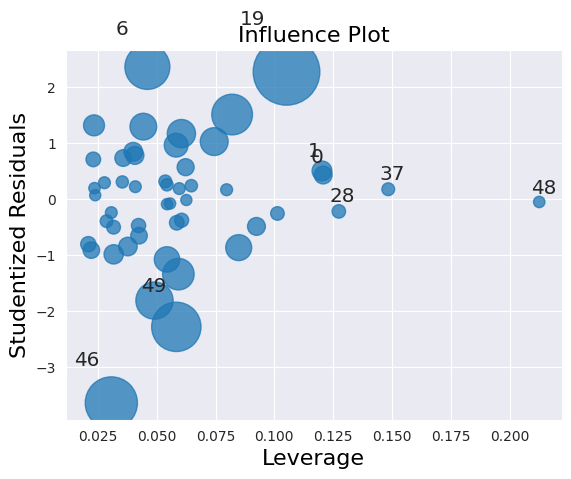

In [ ]:
#High influence points
influence_plot(model)

#Improving the Models

In [ ]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2.tail()

,R&D Spend,Administration,Marketing Spend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


#Final Model


In [ ]:
while np.max(c)>0.5:
    model=smf.ols("Profit~R+AD+MS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) ,np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df2
else:
    final_model=smf.ols("Profit~R+AD+MS",data=data2).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.9507459940683246


#Model Predictions

In [ ]:
new_data=pd.DataFrame({'R':70000,'AD':90000,'MS':140000},index=[0])
new_data

,R,AD,MS
0,70000,90000,140000


In [ ]:
pred_y=final_model.predict(data2)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [ ]:
#Rsqaure value for each models
data3={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data3)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.950746
